Distribution of MI scores of entries in several thesauri. Do thesauri just happen to contain better features?

In [52]:
%cd ~/NetBeansProjects/thesisgenerator/
from thesisgenerator.utils.conf_file_utils import parse_config_file
from thesisgenerator.utils.data_utils import get_tokenized_data, get_tokenizer_settings_from_conf
from thesisgenerator.plugins.bov import ThesaurusVectorizer
from discoutils.thesaurus_loader import Vectors
from sklearn.feature_selection import f_classif

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/thesisgenerator


In [35]:
conf, configspec_file = parse_config_file('conf/exp1/exp1_base.conf')
tr_data = conf['training_data'] + '.gz'
xtr, ytr, _, _ = get_tokenized_data(tr_data,
                                        get_tokenizer_settings_from_conf(conf))

X, vocab = ThesaurusVectorizer(min_df=0).fit_transform(xtr)

In [40]:
fvalues, pvalues = f_classif(X, ytr)

In [92]:
scores = {}
paths = ['../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Baroni.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Add.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Left.events.filtered.strings',
        '../FeatureExtractionToolkit/exp10-13-composed-ngrams/AN_NN_gigaw-100_Right.events.filtered.strings']
for path in paths:
    v = Vectors.from_tsv(path)
    scores_this_composer = []
    for i, (df, idx) in enumerate(vocab.items()):
        if df in v:
            scores_this_composer.append(pvalues[idx])
    scores[path] = scores_this_composer

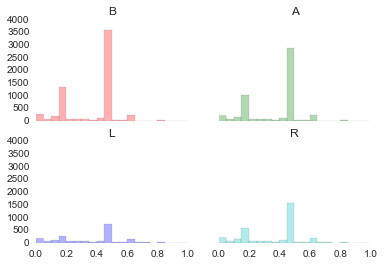

In [94]:
f, axes = plt.subplots(2, 2, sharey=True, sharex=True)
names, colors = 'BALR', 'rgbc'
for i, (_, vals) in enumerate(scores.items()):
    axes.flat[i].hist(vals, bins=20, alpha=.3, color=colors[i]);
    axes.flat[i].set_title(names[i])
plt.savefig('midist.pdf', format='pdf')

In [99]:
X = [
        [1, 1, 0, 0],
        [1, 1, 1, 0],
        [0, 1, 1, 1],
        [0, 0, 1, 1],
    ]
y = np.array([0, 0, 1, 1])
f_classif(X, y)

(array([ inf,   1.,   1.,  inf]),
 array([ 0.        ,  0.42264973,  0.42264973,  0.        ]))

In [101]:
from thesisgenerator.utils.misc import calculate_log_odds
from scipy.sparse import csr_matrix
calculate_log_odds(csr_matrix(X), y)

array([ 14.50865824,   0.69314668,  -0.69314668, -14.50865824])